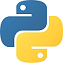
# 06 Search and Sorting Algorithms
ND Sept 2024

# Recap on Asymptotic complexity (Algorithmic Complexity)
#### Taken from Cormen et al. (2022) book 'Algorithms'
Asymptotic complexity, often referred to as algorithmic complexity, is a way to analyse and describe the efficiency of an algorithm in terms of how its runtime or resource usage grows relative to the size of the input data. It provides a mathematical of measuring an algorithm's performance by how it scales for large input sizes. The most commonly used notations for asymptotic complexity are Big O, Big Theta, and Big Omega:
 
* Big O notation describes the asymptotic upper bound – grows no faster than this rate $O(n)$ – <b>no more than </b> linear time
* Big Omega Ω describes the asymptotic lower bound – grows at least as fast as this rate $Ω(n)$ – <b>at least</b> linear time
* Big Theta Θ describes the asymptotically tight bounds – grows precisely at a certain rate $Θ(n)$ – <b>exactly</b> linear time


# Algorithmic Common Runtimes #
The common algorithmic runtimes from fastest to slowest are:

- constant: $O(1)$
- logarithmic: $O($ log $n)$
- linear: $O(n)$
- linearithmic $O(n$ log $n)$
- quadratic: $O(n^2)$
- exponential: $O(2^n)$ 
- factorial: $O(n!)$


![bigo](https://cdn-media-1.freecodecamp.org/images/1*KfZYFUT2OKfjekJlCeYvuQ.jpeg)

## Example of $O(n)$ runtime

In [ ]:
## Codeacademy 

def half(N):
  count = 0
  while N > 1:
    N = N//2
    count += 1
  return count

In [ ]:
## Codeacadeny 

# O(N) runtime 
def find_max(linked_list):
  current = linked_list.get_head_node()
  maximum = current.get_value()
  while current.get_next_node():
    current = current.get_next_node()
    val = current.get_value()
    if val > maximum:
      maximum = val
  return maximum

# Swap

In [ ]:
def swap(arr, left_pos, right_pos):
  temp = arr[left_pos]
  arr[left_pos] = arr[right_pos]
  arr[right_pos] = temp

# Bubble Sort - $O(n^2)$
Bubble sort works by swapping pairs of elements in an array. To sort in ascending order (smallest to largest), then the larger values have to be moved further down the end of the list, and the small values are then moved to the start of the list.
Bubble sort has to keep iterating over the list so that this occurs.

![bubble](https://upload.wikimedia.org/wikipedia/commons/5/54/Sorting_bubblesort_anim.gif)

In [1]:
nums = [9, 8, 7, 6, 5, 4, 3, 2, 1]
print("PRE SORT: {0}".format(nums))

def swap(arr, index_1, index_2):
  temp = arr[index_1]
  arr[index_1] = arr[index_2]
  arr[index_2] = temp

def bubble_sort_unoptimized(arr):
  iteration_count = 0
  for el in arr:
    for index in range(len(arr) - 1):
      iteration_count += 1
      if arr[index] > arr[index + 1]:
        swap(arr, index, index + 1)

  print("PRE-OPTIMIZED ITERATION COUNT: {0}".format(iteration_count))

def bubble_sort_optimized(arr):
  iteration_count = 0
  for i in range(len(arr)):
    # iterate through unplaced elements
    for idx in range(len(arr) - i - 1):
      iteration_count += 1
      if arr[idx] > arr[idx + 1]:
        # replacement for swap function
        arr[idx], arr[idx + 1] = arr[idx + 1], arr[idx]
        
  print("POST-OPTIMIZED ITERATION COUNT: {0}".format(iteration_count))

bubble_sort_unoptimized(nums.copy())
bubble_sort_optimized(nums)
print("POST SORT: {0}".format(nums))

PRE SORT: [9, 8, 7, 6, 5, 4, 3, 2, 1]
PRE-OPTIMIZED ITERATION COUNT: 72
POST-OPTIMIZED ITERATION COUNT: 36
POST SORT: [1, 2, 3, 4, 5, 6, 7, 8, 9]


# Merge Sort - $O(n$ log $n)%$
Merge Sort is a divide and conquer algorithm. It consists of two parts:

1) splitting the original list into smaller sorted lists recursively until there is only 1 element in the list,
2) merging back the presorted 1-element lists into 2-element lists, 4-element lists, and so on recursively.

The merging portion is iterative and takes 2 sublists. The first element of the left sublist is compared to the first element of the right sublist. If it is smaller, it is added to a new sorted list, and removed from the left sublist. If it is bigger, the first element of the right sublist is added instead to the sorted list and then removed from the right sublist. This is repeated until either the left or right sublist is empty. The remaining non-empty sublist is appended to the sorted list.

The Merge Sort algorithm is divided into two parts. The first part repeatedly splits the input list into smaller lists to eventually produce single-element lists. The best, worst and average runtime for this part is Θ(log N). The second part repeatedly merges and sorts the single-element lists to twice its size until the original input size is achieved. The best, worst and average runtime for this part is Θ(N). Therefore, the combined runtime is Θ(N log N).

![mergesort](https://i0.wp.com/blog.shahadmahmud.com/wp-content/uploads/2020/04/ms2.gif?resize=960%2C540&ssl=1)


In [2]:
def merge_sort(items):
  if len(items) <= 1:
    return items

  middle_index = len(items) // 2
  left_split = items[:middle_index]
  right_split = items[middle_index:]

  left_sorted = merge_sort(left_split)
  right_sorted = merge_sort(right_split)

  return merge(left_sorted, right_sorted)

def merge(left, right):
  result = []

  while (left and right):
    if left[0] < right[0]:
      result.append(left[0])
      left.pop(0)
    else:
      result.append(right[0])
      right.pop(0)

  if left:
    result += left
  if right:
    result += right

  return result

unordered_list1 = [356, 746, 264, 569, 949, 895, 125, 455]
unordered_list2 = [787, 677, 391, 318, 543, 717, 180, 113, 795, 19, 202, 534, 201, 370, 276, 975, 403, 624, 770, 595, 571, 268, 373]
unordered_list3 = [860, 380, 151, 585, 743, 542, 147, 820, 439, 865, 924, 387]

ordered_list1 = merge_sort(unordered_list1)
ordered_list2 = merge_sort(unordered_list2)
ordered_list3 = merge_sort(unordered_list3)

print(ordered_list1)
print(ordered_list2)
print(ordered_list3)

[125, 264, 356, 455, 569, 746, 895, 949]
[19, 113, 180, 201, 202, 268, 276, 318, 370, 373, 391, 403, 534, 543, 571, 595, 624, 677, 717, 770, 787, 795, 975]
[147, 151, 380, 387, 439, 542, 585, 743, 820, 860, 865, 924]


# Quicksort - $O(n^2)$
Quicksort’s performance can be inefficient when the algorithm encounters imbalanced partitions. The worst case scenario is if the first or last element is always the partition point for an array or sub-array. In this case, one side of the partition will contain all the elements. This makes the recursive stack deeper, resulting in O(N^2) runtime.
Quick Sort General
Quicksort is a method for sorting an array by repeatedly partitioning it into sub-arrays by:

- Selecting an element from the current array. This element is called the pivot element, and in our implementation we used the mid element.
- Comparing every element in the array to the pivot element, swap the elements into sides greater than and less than. The partition point in the array is where we guarantee everything before is less and everything after is greater than.
- Repeating this process on the sub-arrays separated by the partition point. Do this until a sub-array contains a single element. When the partitioning and swapping are done, the arrays are sorted from smallest to largest.

The worst case runtime for quicksort is O(N^2) and the average runtime for quicksort is O(N logN). The worst case runtime is so unusual that the quicksort algorithm is typically referred to as O(N logN)“

![quicksort](https://upload.wikimedia.org/wikipedia/commons/6/6a/Sorting_quicksort_anim.gif)


In [3]:
from random import randrange, shuffle

def quicksort(list, start, end):
  # this portion of list has been sorted
  if start >= end:
    return
  print("Running quicksort on {0}".format(list[start: end + 1]))
  # select random element to be pivot
  pivot_idx = randrange(start, end + 1)
  pivot_element = list[pivot_idx]
  print("Selected pivot {0}".format(pivot_element))
  # swap random element with last element in sub-lists
  list[end], list[pivot_idx] = list[pivot_idx], list[end]

  # tracks all elements which should be to left (lesser than) pivot
  less_than_pointer = start
  
  for i in range(start, end):
    # we found an element out of place
    if list[i] < pivot_element:
      # swap element to the right-most portion of lesser elements
      print("Swapping {0} with {1}".format(list[i], pivot_element))
      list[i], list[less_than_pointer] = list[less_than_pointer], list[i]
      # tally that we have one more lesser element
      less_than_pointer += 1
  # move pivot element to the right-most portion of lesser elements
  list[end], list[less_than_pointer] = list[less_than_pointer], list[end]
  print("{0} successfully partitioned".format(list[start: end + 1]))
  # recursively sort left and right sub-lists
  quicksort(list, start, less_than_pointer - 1)
  quicksort(list, less_than_pointer + 1, end)


list = [5,3,1,7,4,6,2,8]
shuffle(list)
print("PRE SORT: ", list)
print(quicksort(list, 0, len(list) -1))
print("POST SORT: ", list)


PRE SORT:  [3, 7, 8, 4, 1, 2, 5, 6]
Running quicksort on [3, 7, 8, 4, 1, 2, 5, 6]
Selected pivot 4
Swapping 3 with 4
Swapping 1 with 4
Swapping 2 with 4
[3, 1, 2, 4, 7, 8, 5, 6] successfully partitioned
Running quicksort on [3, 1, 2]
Selected pivot 3
Swapping 2 with 3
Swapping 1 with 3
[2, 1, 3] successfully partitioned
Running quicksort on [2, 1]
Selected pivot 1
[1, 2] successfully partitioned
Running quicksort on [7, 8, 5, 6]
Selected pivot 7
Swapping 6 with 7
Swapping 5 with 7
[6, 5, 7, 8] successfully partitioned
Running quicksort on [6, 5]
Selected pivot 5
[5, 6] successfully partitioned
None
POST SORT:  [1, 2, 3, 4, 5, 6, 7, 8]


# Linear Search
Linear search can be used to search for the smallest or largest value in an unsorted list rather than searching for a match. It can do so by keeping track of the largest (or smallest) value and updating as necessary as the algorithm iterates through the dataset.

In [ ]:
number_list = [ 10, 14, 19, 26, 27, 31, 33, 35, 42, 44]
target_number = 33

def linear_search(search_list, target_value):
  for idx in range(len(search_list)):
    if search_list[idx] == target_value:
      return idx
  raise ValueError("{0} not in list".format(target_value))


try:
  # Call the function below...
  result = linear_search(number_list, target_number)
  print(result)
  linear_search(number_list, 100)
except ValueError as error_message:
  print("{0}".format(error_message))

# Finding Duplicates

In [4]:
# Search list and target value
tour_locations = [ "New York City", "Los Angeles", "Bangkok", "Istanbul", "London", "New York City", "Toronto"]
target_city = "New York City"

#Linear Search Algorithm
def linear_search(search_list, target_value):
  matches = []
  for idx in range(len(search_list)):
    if search_list[idx] == target_value:
      matches.append(idx)
  if matches:
    return matches
  else:
    raise ValueError("{0} not in list".format(target_value))

#Function call
tour_stops = linear_search(tour_locations, target_city)
print(tour_stops)


[0, 5]


# Finding the Maximum Value
In this algorithm we look at each item in turn and update the maximum if a number looked at is greater than the one stored.

In [ ]:
# Search list
test_scores = [88, 93, 75, 100, 80, 67, 71, 92, 90, 83]


#Linear Search Algorithm
def linear_search(search_list):
  maximum_score_index = None
  for idx in range(len(search_list)):
    if not maximum_score_index or search_list[idx] > search_list[maximum_score_index]:
      maximum_score_index = idx
  return maximum_score_index

# Function call
highest_score = linear_search(test_scores)

#Prints out the highest score in the list
print(highest_score)


# Finding index position

In [ ]:
# A list of the ingredients for tuna sushi
recipe = ["nori", "tuna", "soy sauce", "sushi rice"]
target_ingredient = "soy sauce"

def linear_search(search_list, target_value):
  for idx in range(len(search_list)):
    if search_list[idx] == target_value:
      return idx
  raise ValueError("{0} not in list".format(target_value))

print(linear_search(recipe, target_ingredient))

# Recursive Binary Search

The other approach is to utilise a 'divide and conquer' approach to split the list in half each iteration. It requires a sorted list. If the value is less than the middle, then it will be in the first half of the list. 

![Binarysearchvslinear](https://blog.penjee.com/wp-content/uploads/2015/04/binary-and-linear-search-animations.gif)

Recursion is when a block of code calls itself. It does so until a base (end) case is specified.
The recursive calls are 'stacked' on top of each other, and when a condition is met (either the item found or run out of memory), the stacked calls are then executed.

Exceeding the size of the stack is known as 'stack overflow'


In [2]:
# define binary_search()
def binary_search(sorted_list, target):
  if not sorted_list:
    return 'value not found'
  mid_idx = len(sorted_list)//2    # floor division
  mid_val = sorted_list[mid_idx]
  return mid_idx, mid_val


# For testing:
sorted_values = [13, 14, 15, 16, 17]
print(binary_search([], 42))
print(binary_search(sorted_values, 42))

value not found
(2, 15)


In [1]:
# define binary_search()
def binary_search(sorted_list, target):
  if not sorted_list:
    return 'value not found'
  mid_idx = len(sorted_list)//2    # floor division
  mid_val = sorted_list[mid_idx]
  if mid_val == target:
    return mid_idx

# For testing:
sorted_values = [13, 14, 15, 16, 17]
print(binary_search([], 42))
print(binary_search(sorted_values, 42))
print(binary_search(sorted_values, 15))

value not found
None
2


In [5]:
# define binary_search()
def binary_search(sorted_list, target):
  if not sorted_list:
    return 'value not found'
  mid_idx = len(sorted_list)//2   # floor division
  mid_val = sorted_list[mid_idx]
  if mid_val == target:
    return mid_idx
  if mid_val > target:
    left_half = sorted_list[:mid_idx]
    return binary_search(left_half, target)
  if mid_val < target:
    right_half = sorted_list[mid_idx+1:]
    result = binary_search(right_half, target)
    if result == "value not found":
      return result
    else:
      return result + mid_idx + 1
# For testing:
sorted_values = [13, 14, 15, 16, 17]
print(binary_search(sorted_values, 16))

3


In [6]:
def binary_search(sorted_list, left_pointer, right_pointer, target):
  # this condition indicates we've reached an empty "sub-list"
  if left_pointer >= right_pointer:
    return "value not found"
	
  # We calculate the middle index from the pointers now
  mid_idx = (left_pointer + right_pointer) // 2    # floor division
  mid_val = sorted_list[mid_idx]

  if mid_val == target:
    return mid_idx
  if mid_val > target:
    # we reduce the sub-list by passing in a new right_pointer
    return binary_search(sorted_list, left_pointer, mid_idx, target)
  if mid_val < target:
    # we reduce the sub-list by passing in a new left_pointer
    return binary_search(sorted_list, mid_idx + 1, right_pointer, target)
  
values = [77, 80, 102, 123, 288, 300, 540]
start_of_values = 0
end_of_values = len(values)
result = binary_search(values, start_of_values, end_of_values, 288)

print("element {0} is located at index {1}".format(288, result))

element 288 is located at index 4


# Iterative Binary Search

The other approach is to utilise a 'divide and conquer' approach to split the list in half each iteration. It requires a sorted list. If the value is less than the middle, then it will be in the first half of the list. This process is then applied iteratively to cut the list in half each time until the value is found.  

In [7]:
def binary_search(sorted_list, target):
  left_pointer = 0
  right_pointer = len(sorted_list)
  
  # fill in the condition for the while loop
  while left_pointer < right_pointer:
    # calculate the middle index using the two pointers
    mid_idx = (left_pointer + right_pointer) // 2  # floor division
    mid_val = sorted_list[mid_idx]
    if mid_val == target:
      return mid_idx
    if target < mid_val:
      # set the right_pointer to the appropriate value
      right_pointer = mid_idx
    if target > mid_val:
      # set the left_pointer to the appropriate value
      left_pointer = mid_idx + 1
  
  return "Value not in list"

# test cases
print(binary_search([5,6,7,8,9], 9))
print(binary_search([5,6,7,8,9], 10))
print(binary_search([5,6,7,8,9], 8))
print(binary_search([5,6,7,8,9], 4))
print(binary_search([5,6,7,8,9], 6))

4
Value not in list
3
Value not in list
1


## Exercises

Insert a 'code' cell below. In this do the following:

- 1 - Write a function that uses a random number generator to populate a list with values between 0 and 9. Return the populated array and print to screen. 
e.g: [7, 5, 1, 4, 9, 2, 6, 8, 0, 9]
- 2 - Now pass this array to the Bubble Sort method and print out the list to check it has been sorted.
- 3 - Now call the linear search function to check that you can find a number that has been randomly chosen within your list.
- 4 - Apply the binary search function to check that it can find the same value. 
- 5 - Now reuse the function you wrote in step 1 and scale the size to 50,000 integers. DO NOT attempt to print the individual numbers to screen, but do check that the size of the array is 50,000 elements (hint: use the len() method)
- 6 - Now time how long it takes to run the bubble sort algorithm. Start the timer in the statement before calling the OPTIMISED bubble_sort method. Then stop the timer in the statement after the bubble_sort() method call. Output how long it took. 
- 7 - Now generate a new unsorted list of 50,000 integers with values ranging from 0-9, and time how long it takes to sort using the OPTIMISED version of the Bubble sort algorithm. Output the time to the screen and compare against the UNOPTIMISED version.
- 8 - Now generate a new unsorted list of 50,000 integers with values ranging from 0-9, and time how long it takes to sort using the Merge Sort algorithm. Output the time to the screen and compare against the optimised and unoptimised bubble sort algorithms. 
- 9 - Now that you have sorted the array of 50,000 integers. Change the value of the last element of the data structure (49999) to the value 999. e.g. list[49999] = 999. Time how long it takes for the Binary Search method to find this 999 value. Also time how long it takes the Linear Search algorithm to find this 999 value at the end of the data structure. Output these times to the screen and observe if or how they differ.


C++ EXERCISES to ADAPT:

    // initialise a constant for SIZE_S with the value 100
    // initialise a constant for SIZE_L with the value 100000
    int *smallArray; // extend this statement so you point to an array of SIZE_S using the 'new' keyword 
    int *largeArray; // extend this statement so you point to an array of SIZE_L using the 'new' keyword


/*
* Exercise 1: Completing the initArray function below which takes a pointer to an array and the size to iterate through. 
* Write a loop which iterate through the array (being pointed to) and assign random values (using the getRandomNumber function above) for each element.
* You should code the function in a way that can be reused for different array sizes.
*/


/*
* Exercise 2: 
* Implement a Bubble Sort algorithm in the function below. 
* Pass both the small and large arrays to this function and time how long each takes. 
*  
* Extension: are there any ways to optimise this bubble sort function? 
* Compare the time of the optimised against the unoptimised original algorithm 
*/

/*
* Exercise 3: Provided the 'merge' logic below, complete the 'merge sort' function to complete the algorithm.
* Once complete, comment out your 'exercise 2 bubble sort function calls' and instead call merge sort on the small and large arrays. 
*   
* Extension : If you have 'time', why not increase the size of the 'largeArray' by an appropriate interval (e.g. another 100000)
* and observe the time difference between bubble sort and merge sort algorithms.
* What do you notice? 
*/


/* 
* Exercise 4: Implement the Linear Search algorithm below. 
* To start, just check that you can find a value that is in an array (positive case). 
* Also check the negative case - where a value isn't in the array.  
* 
* In the next exercise, we will compare the speed of linear and binary search for locating the same element. 
* 
*/


/* Exercise 5: Now implement the binary search function below. 
* For comparing the time taken to find values, find ensure the small and large arrays are sorted (either sort algorithm).
* Then select values at the start, mid and end of the list to pass to both binary and linear search run on the SAME array. 
* 
* Note: You could modify the signature to pass in left and right, 
* but as left is usually initialised to 0, and right to size-1, 
* this can be infered from size being passed in. 
* 
* Extension : Can you modify the algorithm to not just return/print the first instance of a value, 
* but count (and/or index positions) of each instance of this value in the structure.
*/


## Exercise 1: 

In [ ]:
# Write your solution here.

## Exercise 2: 

In [ ]:
# Write your solution here.

## Exercise 3: 

In [ ]:
# Write your solution here.

## Exericse 4: 

In [ ]:
# Write your solution here.

## Exercise 5:

In [ ]:
# Write your solution here.

## Scenario Exercise: Autocomplete functionality! 
Build an autocomplete function that will show a sublist of results featuring the set of characters entered. Update this after each character is entered. 

Extension: implement this functionality in a search bar via a web interface. Switch to the Python Flask app and query a large dataset